In [1]:
%matplotlib inline
import numpy as np
import glob
import os
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
#plt.rcParams['savefig.dpi'] = 300

#plt.rcParams['figure.autolayout'] = True
#plt.rcParams['figure.figsize'] = 2, 1.5
#plt.rcParams['axes.labelsize'] = 18
#plt.rcParams['axes.titlesize'] = 20
#plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 1.0
#plt.rcParams['lines.markersize'] = 8
#plt.rcParams['legend.fontsize'] = 14

#plt.rcParams['text.usetex'] = True
#plt.rcParams['font.family'] = "serif"
#plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

def figsize(scale):
    fig_width_pt = 345.                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "text.fontsize": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": figsize(0.9),     # default fig size of 0.9 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }
mpl.rcParams.update(pgf_with_latex)

def newfig(width):
    plt.clf()
    fig = plt.figure(figsize=figsize(width))
    ax = fig.add_subplot(111)
    return fig, ax

import seaborn as sns
sns.set(style='ticks', palette='Set2')


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


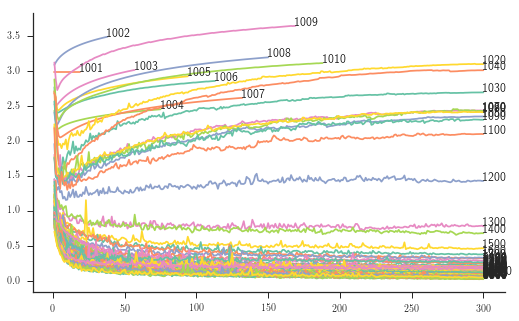

In [4]:
#points = np.array([(1, 1), (-1, 1), (1, -1), (-1, -1)])
rootdir='../../tomdata/'

fig, ax = newfig(1.5)

for infile in sorted(glob.glob( os.path.join(rootdir, 'result_fc_*.csv'))):
    #get network size from name
    match=re.match('^result_(.*)_(\d+)', os.path.basename(infile))
    if match:
        #labelname = match.group(1)+' '+match.group(2)
        labelname=match.group(2)
        data = np.genfromtxt(infile, delimiter=',', names=True)
        plt.plot(data['epoch'], data['validationmainloss'], label=labelname)
        ax.annotate(labelname, xy=(data['epoch'][-1], data['validationmainloss'][-1]))
#plt.legend()
#ax.axis([0,1,-1,1])
#fig.show()
plt.tight_layout(.5)
sns.despine()
plt.savefig('tomplotfc.pgf')
plt.savefig('tomplotfc.pdf')


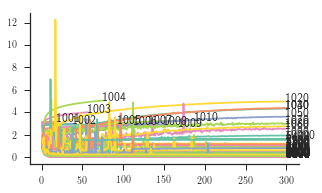

In [5]:
#points = np.array([(1, 1), (-1, 1), (1, -1), (-1, -1)])
rootdir='../../tomdata/'

fig, ax = newfig(0.9)

for infile in sorted(glob.glob( os.path.join(rootdir, 'result_conv_*.csv'))):
    #get network size from name
    match=re.match('^result_(.*)_(\d+)', os.path.basename(infile))
    if match:
        #labelname = match.group(1)+' '+match.group(2)
        labelname=match.group(2)
        data = np.genfromtxt(infile, delimiter=',', names=True)
        plt.plot(data['epoch'], data['validationmainloss'], label=labelname)
        ax.annotate(labelname, xy=(data['epoch'][-1], data['validationmainloss'][-1]))
#plt.legend()
#ax.axis([0,1,-1,1])
#fig.show()
plt.tight_layout(.5)
sns.despine()
plt.savefig('tomplotconv.pgf')
plt.savefig('tomplotconv.pdf')
